## *Import Libraries*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

### *Import Libraries*

In [3]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\data\\insurance.csv"
insurance = pd.read_csv(url)

In [4]:
sns.set_style(style = "whitegrid")

## *Delete Outires*

In [5]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\data\\ford.csv"
ford = pd.read_csv(url)

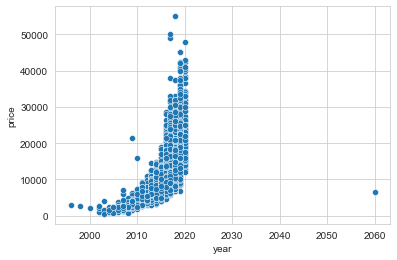

In [6]:
_ = sns.scatterplot(data = ford,x = "year",y = "price")
plt.savefig('C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\img\\scatter.png')
plt.show()

We identified a strange value, it is illogical that a vehicle has a measurement effect of the year 2060, perhaps it is some registry, but the point is that we will have to extract said value since it can affect the performance of the model.

In [8]:
ford_clear = ford.query("year <= 2020")

Select only those vehicles that have a construction date less than or equal to 2020, since it belongs to the date of the most recent models in this dataset.

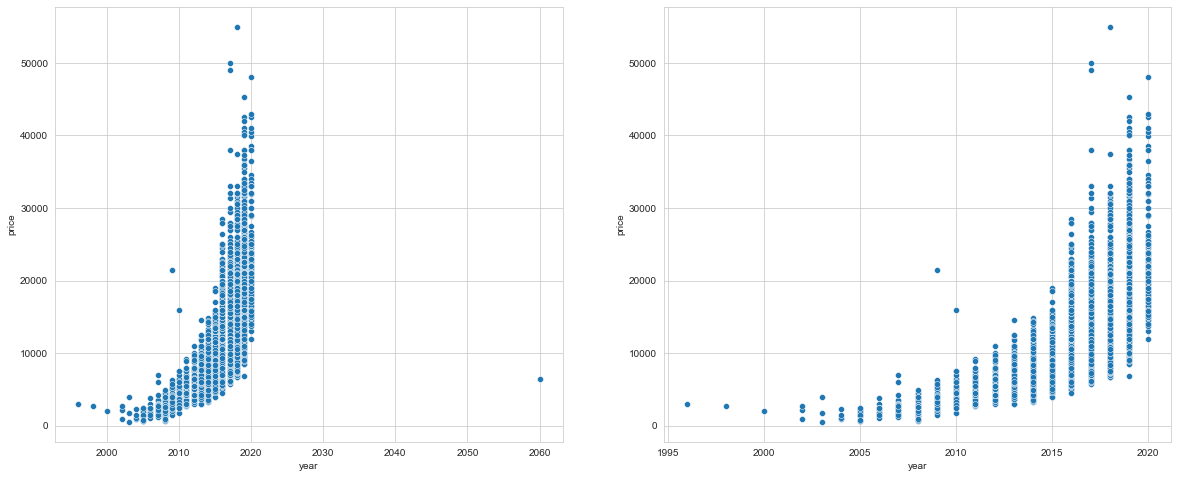

In [9]:
fig,(ax_scatter_1,ax_scatter_2) = plt.subplots(1,2,figsize = (20,8))
sns.scatterplot(data = ford,x = "year",y = "price",ax = ax_scatter_1)
sns.scatterplot(data = ford_clear,x = "year",y = "price",ax = ax_scatter_2)
plt.savefig('C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\img\\ford_clear.png')
plt.show()

There is a better distribution of the data, thanks to the fact that we eliminate that annoying outlier.

## *Remove Outliers Using the IQR method*

<img src = "https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcAqc6V%2FbtqyQLiddUd%2FiXQVu1nYTo2rx3Q8xZBqy0%2Fimg.png" >

All values that are outside these two intervals are considered as abnormal values. Since they can affect the performance of our algorithm.

In [10]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\data\\weight-height.csv"
height_weight = pd.read_csv(url)

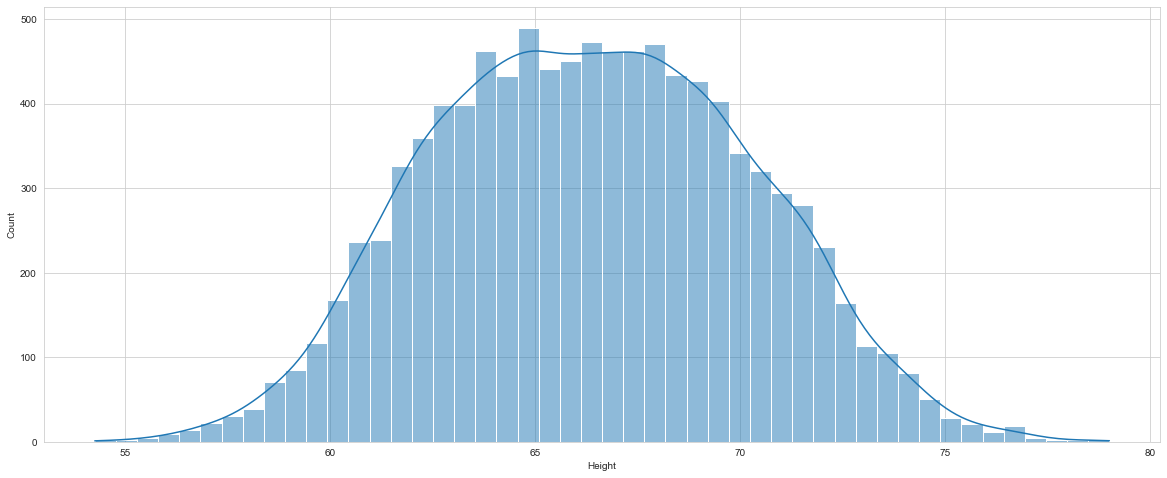

In [11]:
_ = plt.subplots(1,1,figsize = (20,8))
_ = sns.histplot(data = height_weight, x = "Height",kde = True)
plt.savefig("C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\img\\histogram.png")
plt.show()

As you can see in the image, the height data correspond to a normal distribution.

In [12]:
def UpperLimit(x):
    
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3 - q1
    
    return q3 + 1.5 * iqr


def LowerLimit(x):
    
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3 - q1
    
    return q1 - 1.5 * iqr

In [13]:
print(f"Lower Limit: {LowerLimit(height_weight.Height)}")
print(f"Upper Limit: {UpperLimit(height_weight.Height)}")

Lower Limit: 55.00265861279534
Upper Limit: 77.67722359525831


In [14]:
height_weight_clear = height_weight.query("Height > 55.02 and Height < 77.67")

In [15]:
height_weight_clear.Height.describe()

count    9992.000000
mean       66.365006
std         3.833980
min        55.148557
25%        63.509087
50%        66.317827
75%        69.169386
max        77.547186
Name: Height, dtype: float64

Thanks to the query method it can be removed better.

### *Applying Groupby*

You can also calculate the lower and upper intervals, for better cleaning of the data.

In [16]:
height_weight.groupby('Gender')['Height'].apply(LowerLimit)

Gender
Female    56.390756
Male      61.453582
Name: Height, dtype: float64

In [17]:
height_weight.groupby('Gender')['Height'].apply(UpperLimit)

Gender
Female    71.067251
Male      76.709840
Name: Height, dtype: float64

## *Creation of New Features*

In [18]:
height_weight_clear['BMI'] = height_weight_clear.Weight * 703 / height_weight_clear.Height**2

From variables that are related to each other, you can create new variables that complement the statistical power of the model.

In [19]:
height_weight_clear.BMI.head()

0    31.182700
1    24.118677
2    27.230233
3    30.064108
4    29.705117
Name: BMI, dtype: float64

## *Transformation Logarithmic and Square Root*

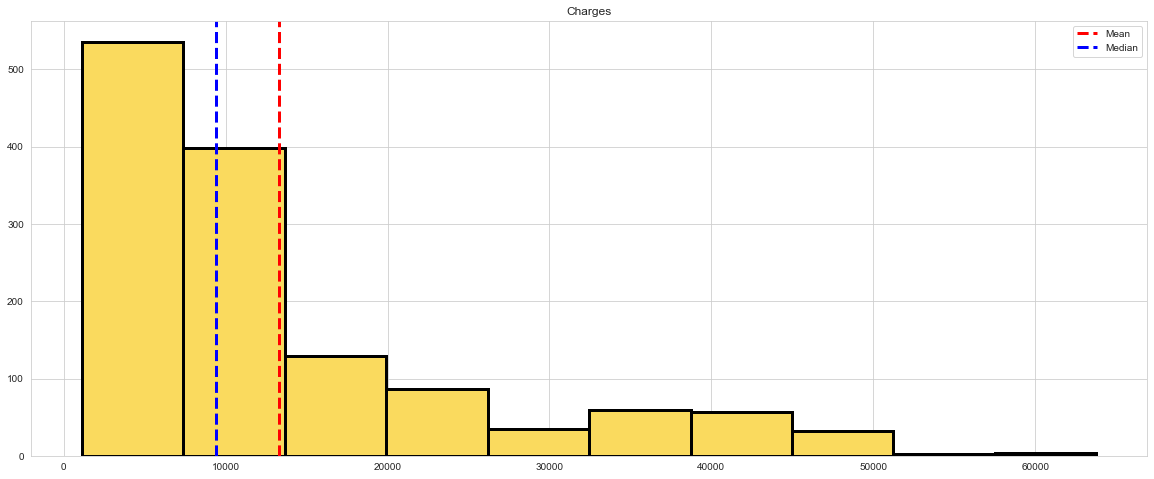

In [20]:
fig,ax = plt.subplots(1,1,figsize = (20,8))
ax.set_title('Charges')
ax.hist(insurance['charges'],ec="k",color="#FADA5E",lw=3)


ax.axvline(insurance['charges'].mean(),
           color="red",
           linestyle="--",
           lw=3,label="Mean")


ax.axvline(insurance['charges'].median(),
           color="blue",
           linestyle="--",
           lw=3,label="Median")

ax.legend()

plt.savefig("C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\img\\histogram_charges.png")
plt.show()

As you observe in the histogram, there is a considerable number of outliers, perhaps there is some explanation, but in this case, if it is treated as an example, we will apply a series of transformations that help to better distribute the data.

In [21]:
insurance['log transformation'] = insurance.charges.apply(np.log)
insurance['sqrt transformation'] = insurance.charges.apply(np.sqrt)

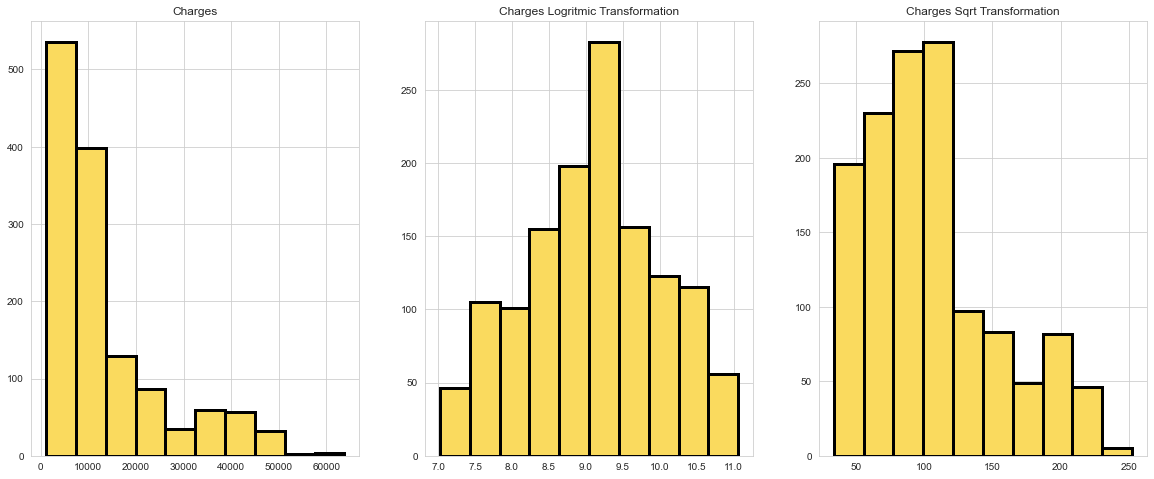

In [22]:

fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(20,8))

ax.set_title('Charges')
ax.hist(insurance['charges'],ec="k",color="#FADA5E",lw=3)

ax1.set_title('Charges Logritmic Transformation')
ax1.hist(insurance['log transformation'],ec="k",color="#FADA5E",lw=3)

ax2.set_title('Charges Sqrt Transformation')
ax2.hist(insurance['sqrt transformation'],ec="k",color="#FADA5E",lw=3)

plt.savefig("C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\img\\histogram_charges_clear.png")
plt.show()

The logarithmic transformation and square root extraction allow a better distribution of the data by smoothing outliers.

## *New Features*

## Treatment of Categorical Variables

In [23]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Blog\\04-Feature-Enginiering\\data\\nissan.csv"
nissan = pd.read_csv(url)

In [24]:
nissan.cylinders.unique()

array(['6 cylinders', '4 cylinders', '8 cylinders', '3 cylinders',
       '5 cylinders', '10 cylinders'], dtype=object)

### *Nominal Categories*

In [25]:
pd.get_dummies(nissan.model).head()

,2017 altima sl,240 sx,240sx,240sx limited edition,240sx s13,240sx se,280zx,300 coupe with t-tops,300zx,300zx 2+2,...,xterra s 4x4,xterra se,xterra se 4dr 4x4,xterra se 4x4,xterra x,xterra xe,xterra xe 4wd,xterra xe 4x4,xterra xe v6 4dr 4wd suv,xterra xe v6 4wd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The model of a car is a nominal variable, since the order of the data does not matter.

### *Ordinal Categories*

In [26]:
nissan.cylinders = nissan.cylinders.str.replace('cylinders','').astype(int)

The cylinders variable imports the order of the data set, so it is not recommended to perform the OHE transformation. In this case we will only have to remove the word "cylinders" and transform it into a numeric format.

In [27]:
nissan.cylinders.unique()

array([ 6,  4,  8,  3,  5, 10])

### *Create New Categories*

In [28]:
model_counts_serie = nissan.value_counts("model")

In [29]:
other_category = model_counts_serie[model_counts_serie < 10]

In [30]:
nissan.model = nissan.model.apply(lambda x: "Other" if x in other_category else x)

Using the lambda function we create a new category called "Other", if the model is in the list it will assign this category, otherwise it will leave them intact.